## Import Libraries

In [18]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
import seaborn as sns

## Load Dataset

In [3]:
# Load the CSV file
df = pd.read_csv("Fish.csv")

# Display the first few rows
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Basic Data Description

In [4]:
# Shape of dataset (rows, columns)
df.shape

(159, 7)

In [5]:
# General info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# Statistical description of numerical columns
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
# Checking missing values
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [8]:
# Checking skewness for each numerical column
df.skew(numeric_only=True)

,0
Weight,1.104450
Length1,0.588482
Length2,0.539863
Length3,0.391541
Height,0.397186
Width,0.004972


## Handling Numerical Data

In [9]:
# Selecting numerical columns only
num_df = df.select_dtypes(include=[np.number])

num_df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


## Standardizing Features

In [10]:
# Standardization: mean = 0, std = 1

scaler = StandardScaler()
standardized = scaler.fit_transform(num_df)

standardized_df = pd.DataFrame(standardized, columns=num_df.columns)
standardized_df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [23]:
scaler_std = StandardScaler()
std_scaled = scaler_std.fit_transform(num_df)

In [29]:
# Convert to numpy array
arr = num_df.to_numpy()
print("Original Array:\n", arr)

Original Array:
 [[2.42000e+02 2.32000e+01 2.54000e+01 3.00000e+01 1.15200e+01 4.02000e+00]
 [2.90000e+02 2.40000e+01 2.63000e+01 3.12000e+01 1.24800e+01 4.30560e+00]
 [3.40000e+02 2.39000e+01 2.65000e+01 3.11000e+01 1.23778e+01 4.69610e+00]
 [3.63000e+02 2.63000e+01 2.90000e+01 3.35000e+01 1.27300e+01 4.45550e+00]
 [4.30000e+02 2.65000e+01 2.90000e+01 3.40000e+01 1.24440e+01 5.13400e+00]
 [4.50000e+02 2.68000e+01 2.97000e+01 3.47000e+01 1.36024e+01 4.92740e+00]
 [5.00000e+02 2.68000e+01 2.97000e+01 3.45000e+01 1.41795e+01 5.27850e+00]
 [3.90000e+02 2.76000e+01 3.00000e+01 3.50000e+01 1.26700e+01 4.69000e+00]
 [4.50000e+02 2.76000e+01 3.00000e+01 3.51000e+01 1.40049e+01 4.84380e+00]
 [5.00000e+02 2.85000e+01 3.07000e+01 3.62000e+01 1.42266e+01 4.95940e+00]
 [4.75000e+02 2.84000e+01 3.10000e+01 3.62000e+01 1.42628e+01 5.10420e+00]
 [5.00000e+02 2.87000e+01 3.10000e+01 3.62000e+01 1.43714e+01 4.81460e+00]
 [5.00000e+02 2.91000e+01 3.15000e+01 3.64000e+01 1.37592e+01 4.36800e+00]
 [3.4000

In [30]:
scaler_std = StandardScaler()
std_arr = scaler_std.fit_transform(arr)

print("\nStandardized Array:\n", std_arr)


Standardized Array:
 [[-4.38072172e-01 -3.05788578e-01 -2.82303007e-01 -1.06020232e-01
   5.96578670e-01 -2.36528948e-01]
 [-3.03562184e-01 -2.25507242e-01 -1.98053663e-01 -2.33668373e-03
   8.21260549e-01 -6.65789457e-02]
 [-1.63447613e-01 -2.35542409e-01 -1.79331587e-01 -1.09769794e-02
   7.97341291e-01  1.65793169e-01]
 [-9.89949100e-02  5.30159764e-03  5.46943678e-02  1.96390116e-01
   8.79771455e-01  2.26210031e-02]
 [ 8.87586153e-02  2.53719316e-02  5.46943678e-02  2.39591594e-01
   8.12834979e-01  4.26371272e-01]
 [ 1.44804444e-01  5.54774324e-02  1.20221635e-01  3.00073664e-01
   1.08395111e+00  3.03431249e-01]
 [ 2.84919015e-01  5.54774324e-02  1.20221635e-01  2.82793073e-01
   1.21901769e+00  5.12357880e-01]
 [-2.33330416e-02  1.35758768e-01  1.48304750e-01  3.25994551e-01
   8.65728838e-01  1.62163285e-01]
 [ 1.44804444e-01  1.35758768e-01  1.48304750e-01  3.34634847e-01
   1.17815367e+00  2.53683979e-01]
 [ 2.84919015e-01  2.26075271e-01  2.13832017e-01  4.29678099e-01
   

## MinMaxScaler (0–1 Scaling)

In [19]:
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(num_df)

In [31]:
scaler_minmax = MinMaxScaler()
minmax_arr = scaler_minmax.fit_transform(arr)

print("\nMin-Max Normalized Array:\n", minmax_arr)


Min-Max Normalized Array:
 [[1.46666667e-01 3.04854369e-01 3.09090909e-01 3.58108108e-01
  5.68334049e-01 4.18978349e-01]
 [1.75757576e-01 3.20388350e-01 3.25454545e-01 3.78378378e-01
  6.24055350e-01 4.59235453e-01]
 [2.06060606e-01 3.18446602e-01 3.29090909e-01 3.76689189e-01
  6.18123353e-01 5.14278868e-01]
 [2.20000000e-01 3.65048544e-01 3.74545455e-01 4.17229730e-01
  6.38566105e-01 4.80364795e-01]
 [2.60606061e-01 3.68932039e-01 3.74545455e-01 4.25675676e-01
  6.21965801e-01 5.76003608e-01]
 [2.72727273e-01 3.74757282e-01 3.87272727e-01 4.37500000e-01
  6.89202837e-01 5.46882048e-01]
 [3.03030303e-01 3.74757282e-01 3.87272727e-01 4.34121622e-01
  7.22699465e-01 5.96371786e-01]
 [2.36363636e-01 3.90291262e-01 3.92727273e-01 4.42567568e-01
  6.35083524e-01 5.13419035e-01]
 [2.72727273e-01 3.90291262e-01 3.92727273e-01 4.44256757e-01
  7.12565153e-01 5.35098106e-01]
 [3.03030303e-01 4.07766990e-01 4.05454545e-01 4.62837838e-01
  7.25433291e-01 5.51392648e-01]
 [2.87878788e-01 4.058

## RobustScaler (Best for Outliers)

In [20]:
scaler_robust = RobustScaler()
robust_scaled = scaler_robust.fit_transform(num_df)

In [32]:
scaler_robust = RobustScaler()
robust_arr = scaler_robust.fit_transform(arr)

print("\nRobust Scaled Array:\n", robust_arr)


Robust Scaled Array:
 [[-5.84905660e-02 -1.46520147e-01 -1.31034483e-01  3.63636364e-02
   5.81520300e-01 -1.03917957e-01]
 [ 3.20754717e-02 -8.79120879e-02 -6.89655172e-02  1.09090909e-01
   7.31027394e-01  2.59681197e-02]
 [ 1.26415094e-01 -9.52380952e-02 -5.51724138e-02  1.03030303e-01
   7.15111118e-01  2.03560952e-01]
 [ 1.69811321e-01  8.05860806e-02  1.17241379e-01  2.48484848e-01
   7.69961533e-01  9.41401187e-02]
 [ 2.96226415e-01  9.52380952e-02  1.17241379e-01  2.78787879e-01
   7.25420878e-01  4.02710508e-01]
 [ 3.33962264e-01  1.17216117e-01  1.65517241e-01  3.21212121e-01
   9.05826105e-01  3.08752302e-01]
 [ 4.28301887e-01  1.17216117e-01  1.65517241e-01  3.09090909e-01
   9.95701671e-01  4.68426678e-01]
 [ 2.20754717e-01  1.75824176e-01  1.86206897e-01  3.39393939e-01
   7.60617340e-01  2.00786775e-01]
 [ 3.33962264e-01  1.75824176e-01  1.86206897e-01  3.45454545e-01
   9.68510068e-01  2.70732428e-01]
 [ 4.28301887e-01  2.41758242e-01  2.34482759e-01  4.12121212e-01
  

## Apply KMeans & Silhouette Score on ALL 3 Scaled Datasets

In [25]:
def get_silhouette_score(data, k=3):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data)
    score = silhouette_score(data, labels)
    return score

In [27]:
from sklearn.metrics import silhouette_score

score_std = get_silhouette_score(std_scaled)
score_minmax = get_silhouette_score(minmax_scaled)
score_robust = get_silhouette_score(robust_scaled)

score_std, score_minmax, score_robust

(np.float64(0.39376420916588467),
 np.float64(0.40207729908648593),
 np.float64(0.3959842483118578))

## Normalizing Observations

In [11]:
# Normalization: values scaled between 0 and 1

normalizer = MinMaxScaler()
normalized = normalizer.fit_transform(num_df)

normalized_df = pd.DataFrame(normalized, columns=num_df.columns)
normalized_df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004


## Grouping Observations Using KMeans Clustering

In [12]:
# KMeans clustering

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(num_df)

# Add cluster column to original dataset
df["Cluster"] = clusters
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,2


## Deleting Observations With Missing Values

In [13]:
# Dropping rows with missing values
df_dropna = df.dropna()

df_dropna.shape

(159, 8)

## Imputing Missing Values (Mean Imputation)

In [14]:
# Filling missing values using mean imputation
df_imputed = df.fillna(df.mean(numeric_only=True))

df_imputed.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0
Cluster,0


## Plotting

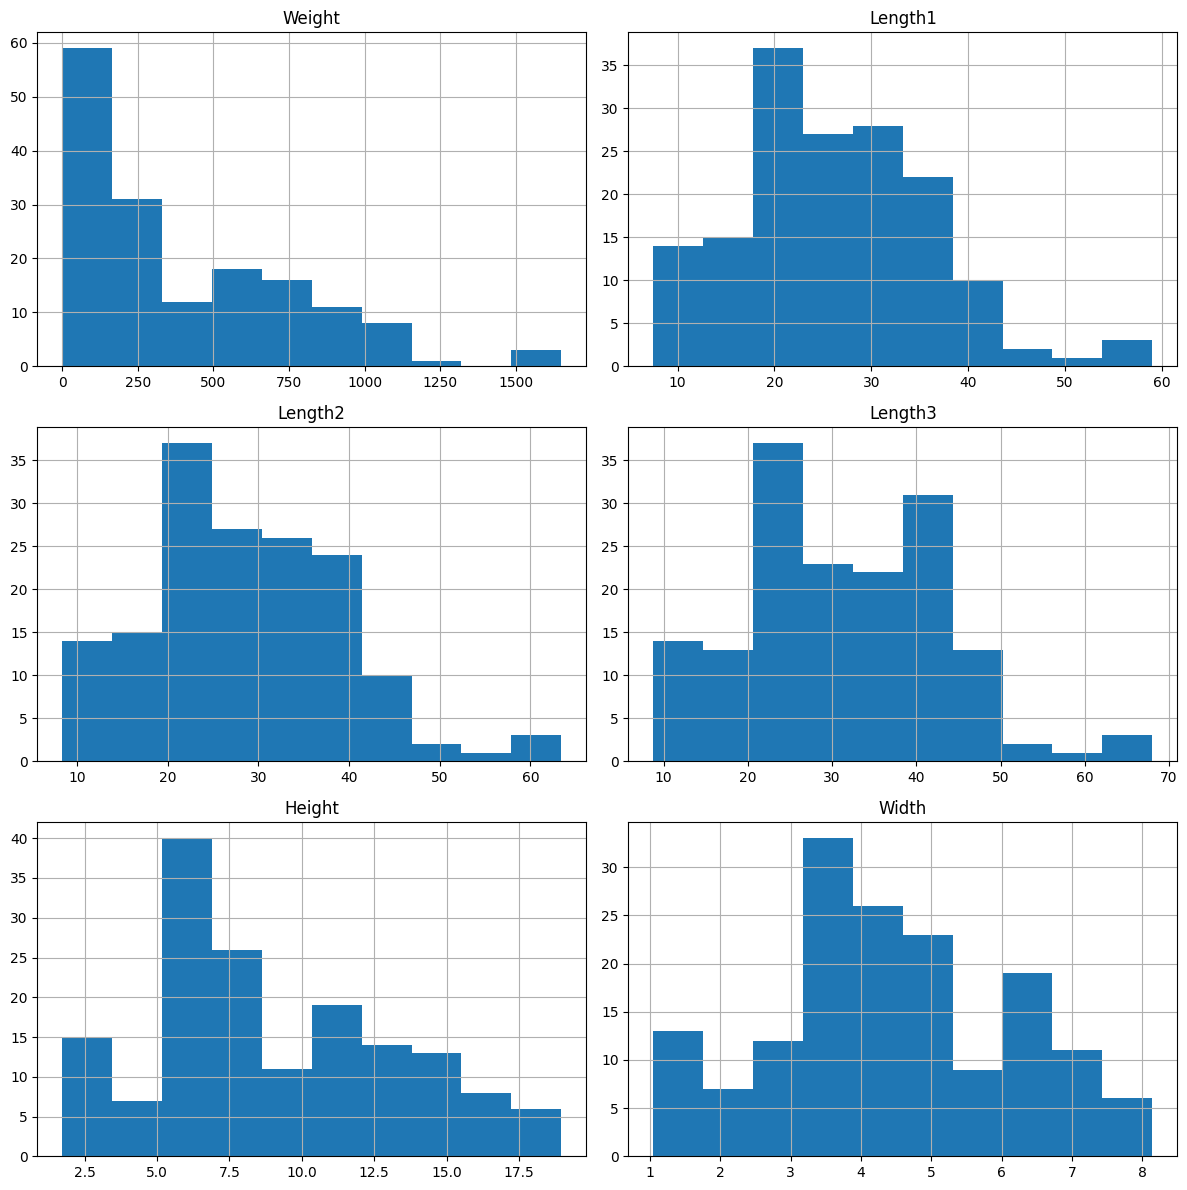

In [15]:
# Plot histograms for all numerical columns

num_df.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

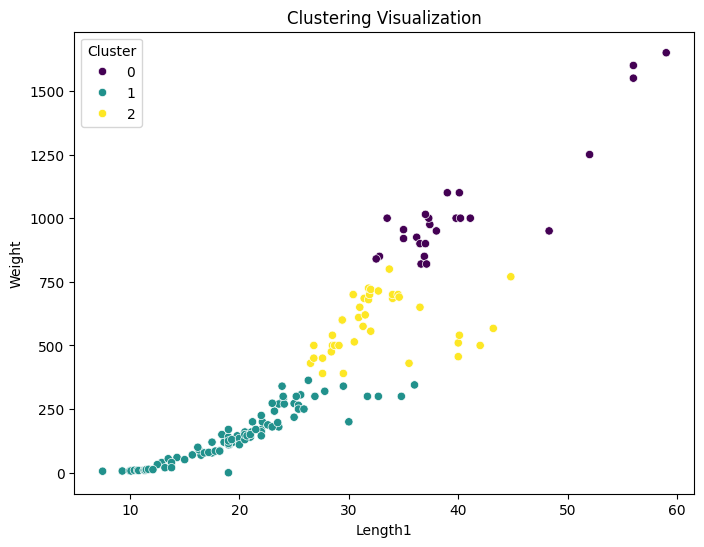

In [17]:
# Visualizing clusters using Length1 and Weight

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Length1"],
    y=df["Weight"],
    hue=df["Cluster"],
    palette="viridis"
)
plt.title("Clustering Visualization")
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.show()